In [1]:
from numpy.fft import fft2
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.special import jv
from NIX_Testing import getDiffractionPattern
%matplotlib inline

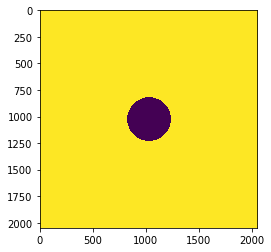

In [2]:
%matplotlib inline
grid = 2048
xx = np.arange(grid)
sz = grid/2
XX, YY = np.meshgrid(xx, xx)
pupil = np.zeros([grid,grid])
#ndx = np.where(((XX-sz)**2+(YY-sz)**2>(grid*2./20.)**2) & ((XX-sz)**2+(YY-sz)**2<(grid*9./20.)**2))
ndx = np.where(((XX-sz)**2+(YY-sz)**2>(grid*2./20.)**2))

pupil[ndx] = 1
plt.imshow(np.real(pupil))

[[23.         20.75978058 14.41343863 ...  5.03431343 14.41343863
  20.75978058]
 [20.75978058 18.76877055 13.12166293 ...  4.75643541 13.12166293
  18.76877055]
 [14.41343863 13.12166293  9.43605182 ...  3.91367991  9.43605182
  13.12166293]
 ...
 [ 5.03431343  4.75643541  3.91367991 ...  2.5073239   3.91367991
   4.75643541]
 [14.41343863 13.12166293  9.43605182 ...  3.91367991  9.43605182
  13.12166293]
 [20.75978058 18.76877055 13.12166293 ...  4.75643541 13.12166293
  18.76877055]]


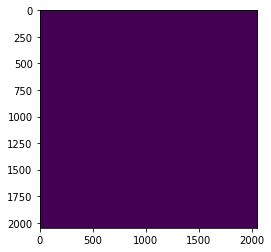

In [3]:
diff = np.absolute(fft2(pupil))
diff = np.roll(diff, sz, axis=0)
diff = np.roll(diff, sz, axis=1)
print diff
plt.imshow(diff)
plt.show()
fits.PrimaryHDU(diff).writeto("diffraction_test.fits", overwrite=True)

In [4]:
n = 10
pix = np.arange(2048*n).astype(float)/n
print pix
#print theta
D = 8.1
f = 3./11.2
wave = 3.65*1e-6
fs = abs(pix*13./60./60./180./1000.*np.pi)*np.pi*D/wave
#fs = abs(theta)/29.
print fs
func = lambda x, f: (2*jv(1,x)-2*f*jv(1,f*x))**2/((1-f**2)**2*x**2) 
#func = lambda x, f: (2*jv(1,x)/x)**2 
res = func(fs, f)

[0.0000e+00 1.0000e-01 2.0000e-01 ... 2.0477e+03 2.0478e+03 2.0479e+03]
[0.00000000e+00 4.39400196e-02 8.78800392e-02 ... 8.99759781e+02
 8.99803721e+02 8.99847661e+02]


/home/ydallilar/.miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in divide
  # This is added back by InteractiveShellApp.init_path()
/home/ydallilar/.miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in divide
  # This is added back by InteractiveShellApp.init_path()


/home/ydallilar/.miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in divide
  # This is added back by InteractiveShellApp.init_path()
/home/ydallilar/.miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in divide
  # This is added back by InteractiveShellApp.init_path()


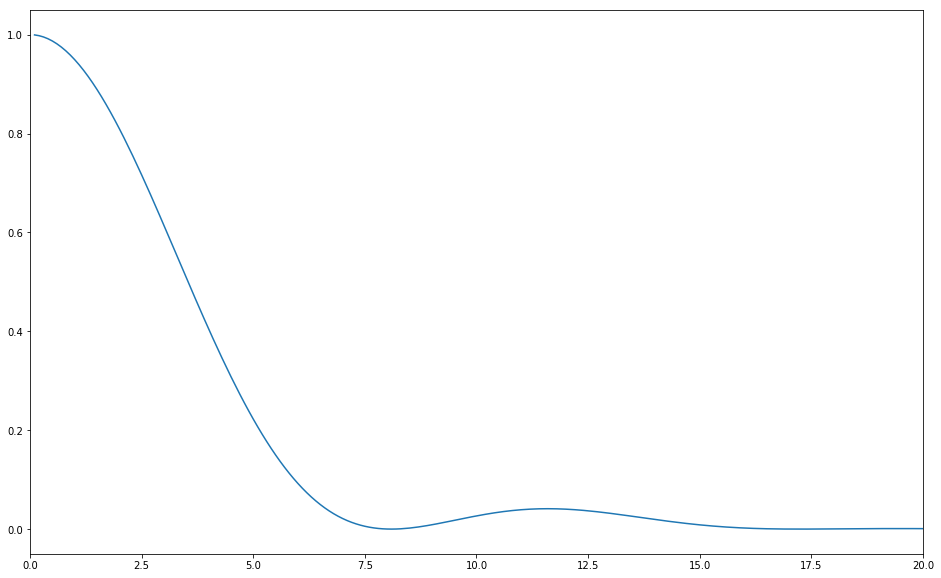

In [5]:
%matplotlib inline
plt.figure(figsize=(16,10))
#for i in range(1, 10, 2):
plt.plot(pix, func(fs,f))
#plt.yscale('log')
plt.xlim(0, 20)
plt.show();

In [6]:
3.8/np.pi*3.65e-6/8.1/np.pi*180*60.*60.*1000


112.42598536953801

/home/ydallilar/.miniconda2/lib/python2.7/site-packages/NIX_Testing.py:605: RuntimeWarning: invalid value encountered in divide
  func = lambda x, y, f: (2*jv(1,R(x,y))-2*f*jv(1,f*R(x,y)))**2/((1-f**2)**2*R(x,y)**2)


[[-8.91005953 -8.46455655 -8.01905358 ...  8.01905358  8.46455655
   8.91005953]
 [-8.91005953 -8.46455655 -8.01905358 ...  8.01905358  8.46455655
   8.91005953]
 [-8.91005953 -8.46455655 -8.01905358 ...  8.01905358  8.46455655
   8.91005953]
 ...
 [-8.91005953 -8.46455655 -8.01905358 ...  8.01905358  8.46455655
   8.91005953]
 [-8.91005953 -8.46455655 -8.01905358 ...  8.01905358  8.46455655
   8.91005953]
 [-8.91005953 -8.46455655 -8.01905358 ...  8.01905358  8.46455655
   8.91005953]]
[[-8.91005953 -8.91005953 -8.91005953 ... -8.91005953 -8.91005953
  -8.91005953]
 [-8.46455655 -8.46455655 -8.46455655 ... -8.46455655 -8.46455655
  -8.46455655]
 [-8.01905358 -8.01905358 -8.01905358 ... -8.01905358 -8.01905358
  -8.01905358]
 ...
 [ 8.01905358  8.01905358  8.01905358 ...  8.01905358  8.01905358
   8.01905358]
 [ 8.46455655  8.46455655  8.46455655 ...  8.46455655  8.46455655
   8.46455655]
 [ 8.91005953  8.91005953  8.91005953 ...  8.91005953  8.91005953
   8.91005953]]
62.1378131364906

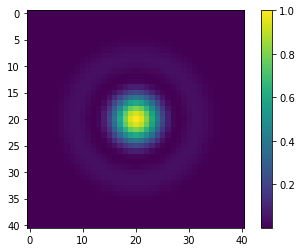

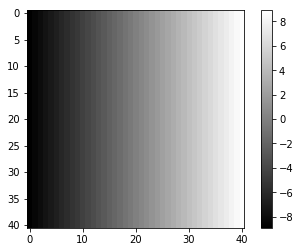

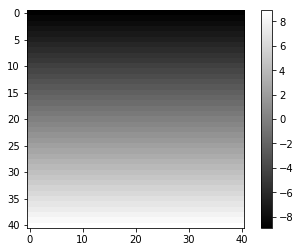

In [7]:
%matplotlib inline
X, Y, im = getDiffractionPattern(3.6, 13)
print np.sum(im)
plt.figure()
plt.imshow(im)
plt.colorbar()
plt.figure()
plt.imshow(X, cmap='gray')
plt.colorbar()
plt.figure()
plt.imshow(Y, cmap='gray')
plt.colorbar()
plt.show()